# Funciones de distribución de probabilidades

## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100259., 100360., 100314., 100267.,  99876., 100268.,  99635.,
         99974.,  99381.,  99666.]),
 array([ 1.00002322, 10.90001198, 20.80000074, 30.69998951, 40.59997827,
        50.49996703, 60.39995579, 70.29994455, 80.19993332, 90.09992208,
        99.99991084]),
 <BarContainer object of 10 artists>)

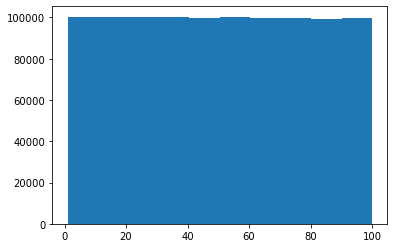

In [14]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [21]:
data = np.random.randn(1000000)

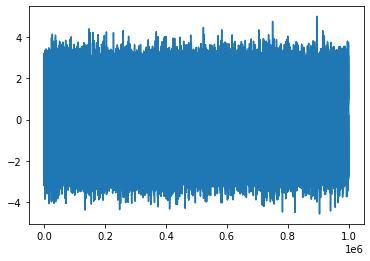

In [24]:
x = range(1, 1000001)
plt.plot(x, data)

(array([1.51000e+02, 3.75200e+03, 4.04730e+04, 1.85000e+05, 3.57350e+05,
        2.93938e+05, 1.03014e+05, 1.53930e+04, 9.06000e+02, 2.30000e+01]),
 array([-4.58467771, -3.62414817, -2.66361863, -1.70308909, -0.74255955,
         0.21797   ,  1.17849954,  2.13902908,  3.09955862,  4.06008816,
         5.0206177 ]),
 <BarContainer object of 10 artists>)

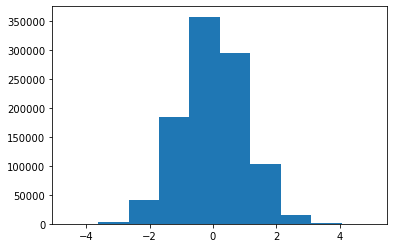

In [25]:
plt.hist(data)

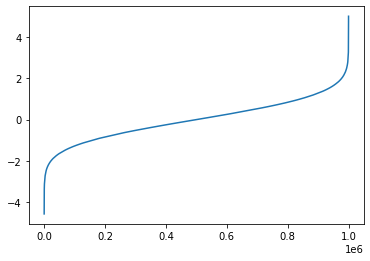

In [26]:
plt.plot(x, sorted(data))

(array([  15.,  120.,  594., 1662., 2855., 2683., 1492.,  485.,   89.,
           5.]),
 array([1.79317859, 2.54600771, 3.29883684, 4.05166596, 4.80449509,
        5.55732421, 6.31015334, 7.06298247, 7.81581159, 8.56864072,
        9.32146984]),
 <BarContainer object of 10 artists>)

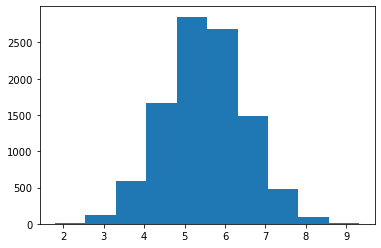

In [29]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + Z_10000 # z = (X - mu) / sd --> N(0, 1), X = mu + sd * z
plt.hist(data)

In [30]:
data = np.random.randn(2, 4)
data

array([[-0.70937129, -0.3348544 ,  0.37959975,  0.16143008],
       [ 0.28216161,  0.25738091, -0.23278178,  0.13160457]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios x e y entre 0 y 1 en total 1000 veces
* Calcularemos x * x + y * y
    * Si el valor es inferior a 1 --> estamos dentro del círculo.
    * Si el valor es superior a 1 --> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de PI.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener diferentes aproximaciones de PI.
* Calculamos el promedio de los 100 experimentos para dar un valor final de PI.

In [35]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1416279999999994


(3.1416279999999994, [<matplotlib.lines.Line2D at 0x7f5cbaeabb50>])

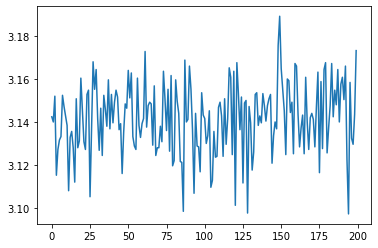

In [36]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [5]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5, 32, n)
    }
)

In [8]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000632,1.498091,18.502139
std,1.002056,2.498089,7.793360
min,-4.852939,-10.167131,5.000003
25%,-0.674919,-0.185961,11.742104
50%,-0.000163,1.495809,18.503365
75%,0.677502,3.185871,25.253461
max,4.745465,13.438556,31.999969


(array([5.60000e+01, 1.70700e+03, 2.25360e+04, 1.31399e+05, 3.22945e+05,
        3.38115e+05, 1.52092e+05, 2.88030e+04, 2.25300e+03, 9.40000e+01]),
 array([-4.85293911, -3.89309869, -2.93325827, -1.97341785, -1.01357743,
        -0.05373701,  0.90610341,  1.86594383,  2.82578425,  3.78562467,
         4.74546509]),
 <BarContainer object of 10 artists>)

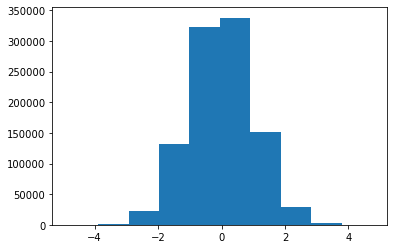

In [9]:
plt.hist(data['A'])

(array([1.06000e+02, 2.58100e+03, 3.06110e+04, 1.53357e+05, 3.35458e+05,
        3.19237e+05, 1.32848e+05, 2.38830e+04, 1.86600e+03, 5.30000e+01]),
 array([-10.16713116,  -7.80656239,  -5.44599363,  -3.08542487,
         -0.72485611,   1.63571266,   3.99628142,   6.35685018,
          8.71741895,  11.07798771,  13.43855647]),
 <BarContainer object of 10 artists>)

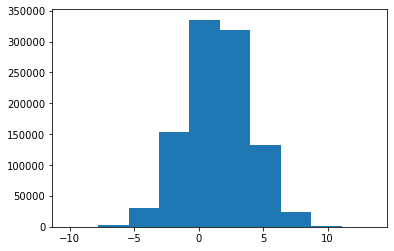

In [10]:
plt.hist(data['B'])

(array([ 99800., 100260., 100024.,  99752., 100041.,  99826., 100048.,
        100347., 100164.,  99738.]),
 array([ 5.00000309,  7.69999966, 10.39999622, 13.09999279, 15.79998935,
        18.49998592, 21.19998248, 23.89997905, 26.59997561, 29.29997218,
        31.99996875]),
 <BarContainer object of 10 artists>)

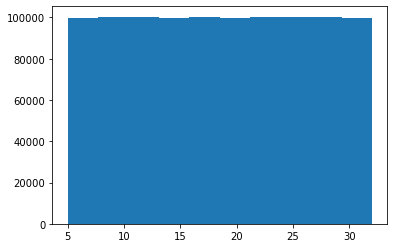

In [13]:
plt.hist(data['C'])

In [14]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [15]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [16]:
column_names = data.columns.values.tolist()

In [17]:
a = len(column_names)
a

21

In [20]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A': np.random.rand(a),
        'B': np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a)
)

In [21]:
new_data

,Column Name,A,B
42,State,0.192155,0.220465
43,Account Length,0.428265,0.331750
44,Area Code,0.032963,0.901834
45,Phone,0.411443,0.382576
46,Int'l Plan,0.906252,0.708009
47,VMail Plan,0.551277,0.729835
48,VMail Message,0.431665,0.978303
49,Day Mins,0.857643,0.932397
50,Day Calls,0.205742,0.503468
51,Day Charge,0.802615,0.423076
